In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
%matplotlib inline

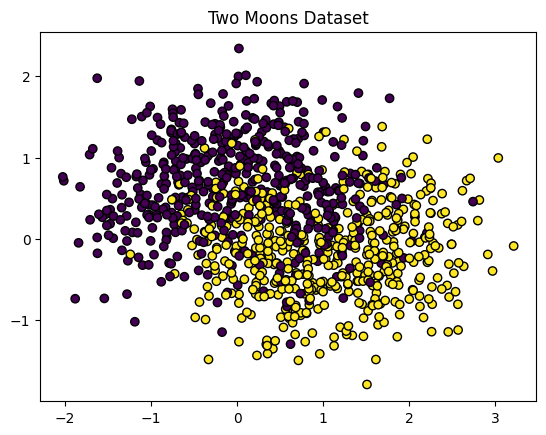

In [2]:
# Generate the two moons dataset
X, y = make_moons(n_samples=1000, noise=0.5, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title('Two Moons Dataset')
plt.show()


In [3]:
# As you know we need to split the data into training, validation and test
x_train=X[0:800,:]
y_train=y[0:800].astype(int)

x_val=X[800:900,:]
y_val=y[800:900].astype(int)

x_test=X[900:1000,:]
y_test=y[900:1000].astype(int)

In [ ]:
# Kernel functions remain the same
def linear_kernel(X, Y):
    """Compute the linear kernel between X and Y."""
    return np.dot(X, Y.T)

def polynomial_kernel(degree=3, coef0=1):
    def thunk(X,Y):
        """Compute the polynomial kernel between X and Y."""
        return (np.dot(X, Y.T) + coef0) ** degree
    return thunk

def rbf_kernel(gamma):
    def thunk(X,Y):
        """Compute the RBF (Gaussian) kernel between X and Y."""
        X_norm = np.sum(X ** 2, axis=1)
        Y_norm = np.sum(Y ** 2, axis=1)
        K = np.exp(-gamma * (
            X_norm[:, np.newaxis] + Y_norm[np.newaxis, :] - 2 * np.dot(X, Y.T)))
        return K
    return thunk



class SVM:

    def __init__(self, kernel, lr=1.0, C=1.0, epochs=1000):
        """
        Initialize the Kernel Ridge Regression model.

        Parameters:
        - kernel: string, specifies the kernel type ('linear', 'polynomial', 'rbf')
        - lr: float, learning_rate
        - C: float, hyperparameter
        - epochs: int, number of training epochs
        """
        self.kernel = kernel
        self.lr = lr
        self.C = C
        self.epochs = epochs
        self.alpha = None
        self.b = 0
        self.X = None
        self.y = None

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.X = X
        self.y = np.where(y <= 0, -1, 1)
        
        self.alpha = np.zeros(n_samples)
        
        K = self._compute_kernel(X, X)
        
        for _ in range(self.epochs):
            for i in range(n_samples):
                pred = np.sum(self.alpha * self.y * K[i]) + self.b
                
                if self.y[i] * pred < 1:
                    self.alpha[i] += self.lr * (1 - self.y[i] * pred)
                    self.b += self.lr * self.y[i]
                
                self.alpha[i] = min(self.C, max(0, self.alpha[i]))

    def predict(self, X):
        K = self._compute_kernel(X, self.X_train)
        y_pred = np.sum(self.alpha * self.y_train * K.T, axis=1)
        return np.sign(y_pred)


def decision_boundary_draw(model, X, y, step=200):
    """
    Draw the decision boundary of the trained SVM model.
    
    Parameters:
    - model: Trained SVM instance (with model.predict method)
    - X: Input data array of shape (N, 2) for plotting (assuming 2D data).
    - y: Labels array of shape (N,)
    - step: Resolution of the grid for plotting.
    """
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, step),
                         np.linspace(y_min, y_max, step))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()



In [7]:
# Train and evaluate

acc = accuracy_score(y_test, y_pred)

print("Test Accuracy:", acc)

# Draw decision boundary 
decision_boundary_draw(model, X, y, step=200)

NameError: name 'y_pred' is not defined